Íñigo Martín Melero

Práctica Opcional 2a: Pokemon.

Seguimos con la BBDD de Pokemon, de la Generación I hasta la VII. A diferencia de la práctica anterior, en esta haremos uso de otra librería para realizar gráficas, seaborn.

0. Carga de Datos en DataFrame

In [1]:
#Importamos pandas, matplotlib y seaborn, y leemos con read_csv para cargar directamente un DataFrame.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemonDF=pd.read_csv('C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional2/pokemon.csv')
print(pokemonDF)

                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

1. Representación en 1 variable

1.1 Número de individuos por generación

<AxesSubplot:xlabel='generation', ylabel='count'>

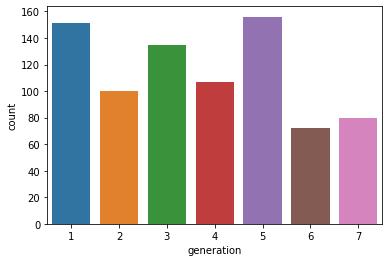

In [2]:
#Primer ploteo sencillo, que nos saca seaborn directamente.

sns.countplot(x=pokemonDF['generation'])

El eje X representa el número de generación (de la 1 a la 7). A la 1 pertenecen los primeros videojuegos de Pokemon lanzados; a la 7 pertenecen los lanzados recientemente. El eje Y representa el número de Pokemon que posee cada generación. Como vemos, en las generaciones 1 y 5 se crearon un mayor número de Pokemon, y en la que menos se crearon fue la generación 6.
Este ploteo se puede hacer de forma muy similar tanto en pandas como en matplotlib, como vimos en el Ejercicio Opcional 1.

1.2 Frecuencia de individuos por hp

C:\Users\inima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

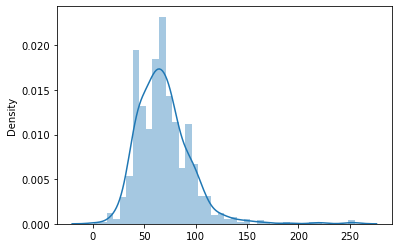

In [102]:
#Primero, lo hacemos con seaborn, de forma muy sencilla

sns.distplot(x=pokemonDF['hp'], bins=40, kde=True)

#Cabe destacar que salta un error en el que dice que distplot está depreciado, a favor de displot.
#Si probamos con displot, es muy muy similar a distplot, solo que con los contornos de las líneas en sólido.

El eje X representa la cantidad de puntos de salud (hp) que tiene el pokemon, y el eje Y representa la densidad (cuántos pokemon respecto del total tienen esos puntos de salud, en tanto por 1). Vemos que la mayoría está en el rango 50 - 100, especialmente en los valores cercanos a 80.
Solo podría mejorarse la visualización si se hiciese zoom en ese intervalo 50 - 100, en mi opinión. 
La representación en histograma es posible desde pandas y matplotlib, pero la línea suavizada de densidad ya es más compleja de dibujar con matplotlib.

1.3 Distribucion de pesos

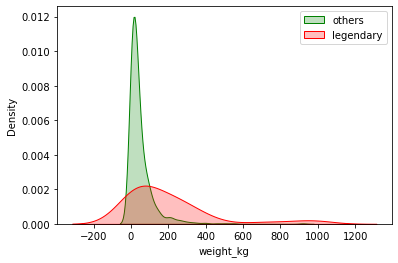

In [103]:
#Ploteamos los dos, con kdeplot, y creamos la leyenda.

sns.kdeplot(x=pokemonDF.query('is_legendary == 0').weight_kg,color='green',fill=True, label='others')
sns.kdeplot(x=pokemonDF.query('is_legendary == 1').weight_kg,color='red',fill=True, label = 'legendary')
plt.legend()

En el eje X se representa el peso de los Pokemon, y en el eje Y se representa la densidad (Pokemon respecto del total). En verde queda representado el peso de los no legendarios, y en rojo el de los legendarios. Se puede inferir que los pesos más habituales, para los no legendarios y legendarios, están en torno a los 0 - 200 kg. Se visualiza también que los legendarios son especiales, porque algunos tienen pesos que llegan hasta los 1000 kg, e incluso negativos. La campana de Gauss para los legendarios es más amplia que para los no legendarios.
Podría representarse mejor si se hiciese "zoom" en el intervalo de 0 a 200 kg. En un ejercicio como este, para mostrar la leyenda, uno busca en Internet y se percata que, en realidad, seaborn emplea matplotlib por debajo. 

2. Representación en 2 variables

2.1 Relacion capacidades ataque y defensa

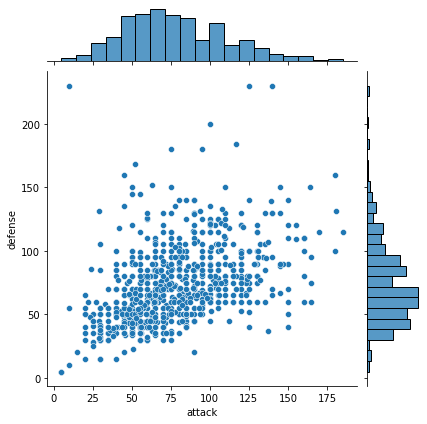

In [104]:
#Usamos jointplot a secas

sns.jointplot(data=pokemonDF,x='attack', y='defense')

El eje X representa el ataque, y el eje Y representa la defensa. Como en el Ejercicio Opcional 1, se puede inferir que la mayoría de Pokemon están en torno a los intervalos 50 - 100 de defensa y ataque. 
Respecto de matplotlib, vemos que seaborn incluye en el lado derecho y arriba las barras de frecuencia acumulada. En la siguiente visualización veremos estas barras representadas en hexágonos, en el propio gráfico. 

2.2 Relacion capacidades ataque y defensa, hexágono

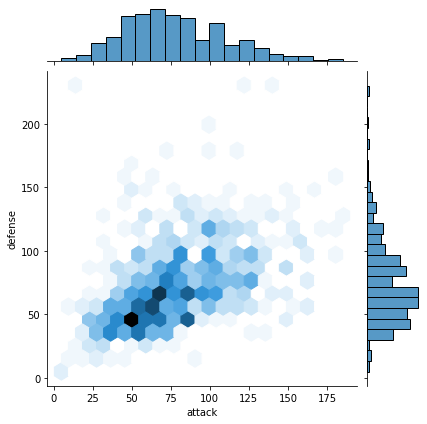

In [106]:
#Usamos jointplot con tipo hex

sns.jointplot(data=pokemonDF,x='attack', y='defense',kind='hex', gridsize=20)

El eje X representa el ataque, y el eje Y representa la defensa, otra vez. 
La visualización aquí es mejor, porque "interseca" la barra lateral de defensa y la superior de ataque, que representan la frecuencia con la que se da esa combinación. Así, podemos concretar (respecto del intervalo del apartado anterior), que la combinación más habitual es 50 de ataque y 50 de defensa. Los valores de 100 de ataque y defensa no son habituales, nos movemos más bien por el rango 50 - 70, en ataque y defensa. A mayor defensa, suele tenerse un mayor ataque, en general.
Respecto de pandas y matplotlib, podríamos haber representado el diagrama con hexágonos, pero hubiera resultado muy complejo construir la barrita lateral y la superior. Con Seaborn, sale fácil.

2.3 Relacion capacidades ataque y defensa, gráfico de contorno

<AxesSubplot:xlabel='hp', ylabel='attack'>

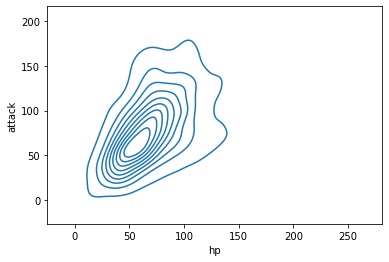

In [112]:
#Se solicita realizar el plot KDE en 2 dimensiones. Este sale monocolor, no se me cambian las fronteras de colores

sns.kdeplot(x=pokemonDF['hp'], y=pokemonDF['attack'])

<AxesSubplot:xlabel='hp', ylabel='attack'>

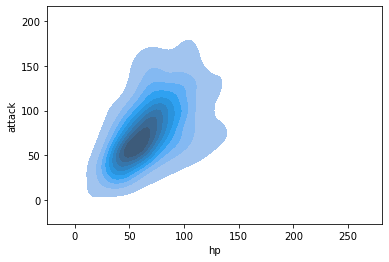

In [113]:
#Pruebo a hacerlo también con los colores rellenos

sns.kdeplot(x=pokemonDF['hp'], y=pokemonDF['attack'], fill=True)

El eje X representa los puntos de salud (hp) y el eje Y representa el ataque. Se infiere, en general, que a mayor puntos de salud (hp) el Pokemon tiende a tener también un mejor ataque, por lo que sus características son mejores. Esto no es casualidad: cada vez que un Pokemon sube de nivel, sus hp aumentan y el resto de sus estadísticas también mejoran (ataque, defensa, etc.). 

2.4 Relacion capacidades ataque y defensa, gráfico de cajas

<AxesSubplot:xlabel='is_legendary', ylabel='attack'>

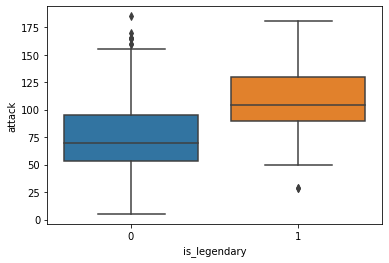

In [114]:
#Ploteo de cajas y bigotes

sns.boxplot(data=pokemonDF,x='is_legendary',y='attack')

El eje X representa si el Pokemon es legendario (1) o si es normal (0). El eje Y representa el ataque del Pokemon. En este gráfico se visualiza claramente que, en general, los Pokemon legendarios tienen mejores (más altas) estadísticas de ataque que los Pokemon corrientes y convencionales. No obstante, hay excepciones (puntos negros) de Pokemons legendarios con ataques muy bajos y Pokemons convencionales con ataques muy elevados. 

2.4 Relacion capacidades ataque y defensa, gráfico de violín

<AxesSubplot:xlabel='is_legendary', ylabel='attack'>

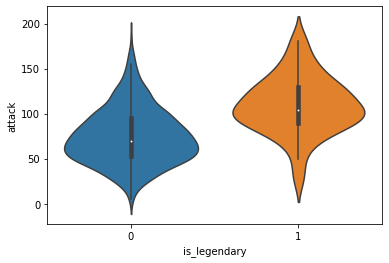

In [116]:
#Ploteo en violin.

sns.violinplot(data=pokemonDF,x='is_legendary',y='attack')

Igual que antes, el eje X representa si el Pokemon es legendario (1) o si es normal (0). El eje Y representa el ataque del Pokemon. 
En este gráfico puede visualizarse bien el reparto de las medianas y valores más comunes, ya que nos da una mejor idea de la frecuencia de cada ataque para valores más concretos. Concluimos que la mayoría de Pokemon legendarios tienen un ataque en torno a 100 - 150, mientras que los normales se mueven en 50 - 100. 

3. Subgráficas

3.1 Capacidad de ataque dependiendo de si es legendario o no

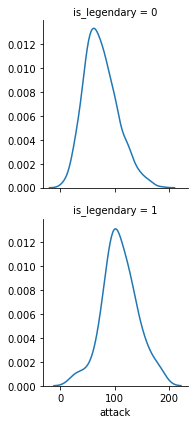

In [3]:
#Hacemos primero el ploteo vertical, y escondemos el texto del eje Y (para que
#esté exactamente como el legendario. Añadimos también el título. 
#Escondemos eje X para la primera gráfica.

g = sns.FacetGrid(pokemonDF, col="is_legendary", col_wrap=1)
g.map(sns.kdeplot, "attack").set(ylabel=None)



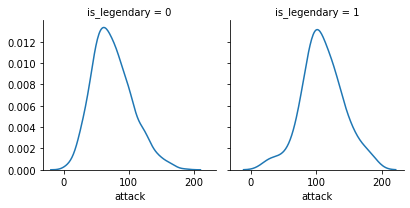

In [248]:
#Y ahora, el ploteo horizontal. Quitamos títulos e eje Y, y escondemos el eje Y
#de la segunda gráfica.

g = sns.FacetGrid(pokemonDF, col="is_legendary")
g.map(sns.kdeplot, "attack").set(ylabel=None)

El eje X representa el ataque, y el Y representa la densidad (en tanto por 1, frecuencia respecto del total de Pokemon) que tienen ese ataque. La información obtenida respecto de apartados anteriores es la misma: los legendarios se mueven en un mayor nivel de ataque. Podemos ver también que las gráficas pueden modelizarse según una distribución normal, de distinta media pero similar desviación típica. 

3.2 Capacidad de ataque dependiendo de si es legendario o no, según generación

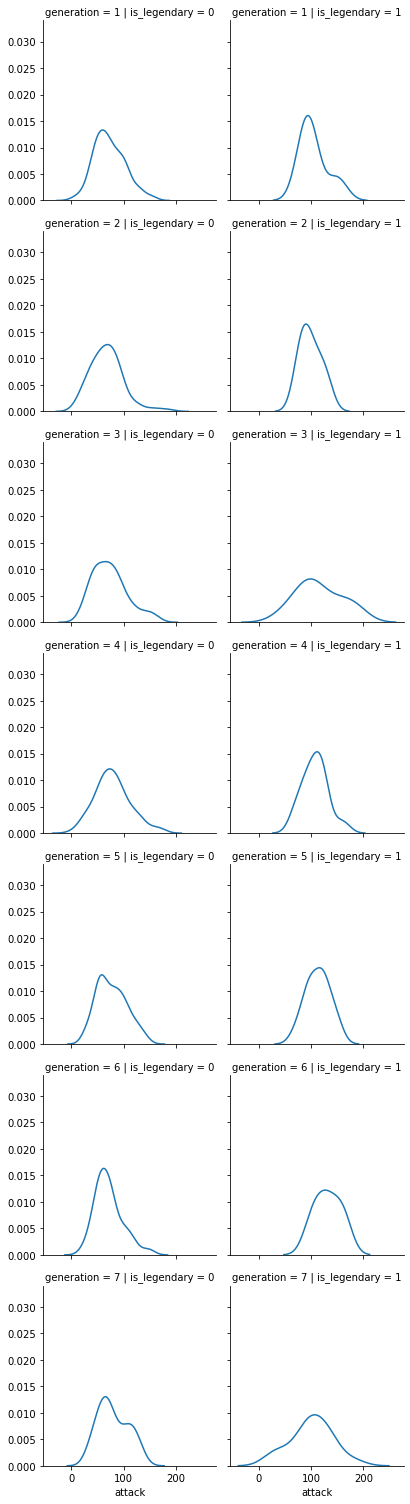

In [259]:
g = sns.FacetGrid(pokemonDF, col="is_legendary", row="generation")
g.map(sns.kdeplot, "attack").set(ylabel=None, ylim=[0, 0.034])

En el eje X, se representa el ataque y en el Y la densidad de la frecuencia. Aproximadamente, en cada generación se han introducido pokemons normales y legendarios con estadísiticas similares de ataque. Respecto del enunciado, la única gráfica que sale ligeramente diferente es la de los legendarios de la generación 1. 

3.3 Relación entre diferentes variables

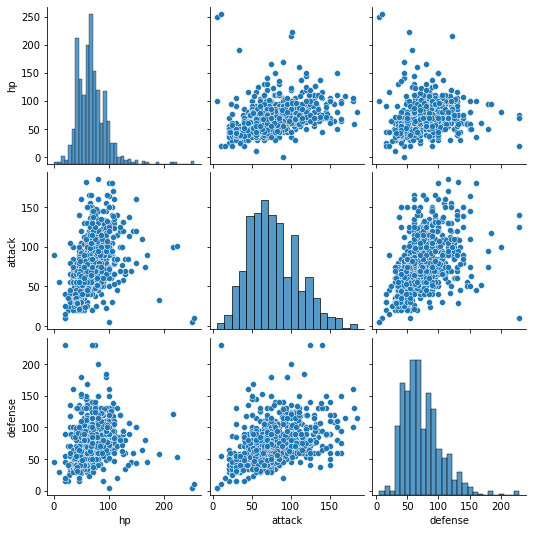

In [216]:
#Lo definimos sencillamenre con un pairplot

sns.pairplot(pokemonDF[['hp', 'attack', 'defense']])


Estas gráficas están divididas en una cuadrícula 9 x 9, de tal forma que relacionamos todas ellas 1 a 1. Es decir, los ejes X e Y de las gráficas 1 a 9 (empezando desde arriba y recorriendo hacia la derecha) son:
Gráfica 1 - (x:hp, y:hp)        Gráfica 2 - (x:attack, y:hp)        Gráfica 3 - (x:defense, y:hp)
Gráfica 4 - (x:hp, y:attack)    Gráfica 5 - (x:attack, y:attack)    Gráfica 6 - (x:defense, y:attack)
Gráfica 7 - (x:hp, y:defense)   Gráfica 8 - (x:attack, y:defense)   Gráfica 9 - (x:defense, y:defense)
Esta clase de gráficos son muy útiles para ver las relaciones de las diferentes variables a la vez, a golpe de vista. 
Se deduce que, como en gráficas anteriores, a mayor defensa se suele tener un mayor ataque, y esto a la vez acarrea unos valores más elevados de puntos de salud. Normalmente, si existe algún Pokemon con muy altas estadísticas pero bajos hp, o al contrario, suele ser algo introducido a propósito por los desarrolladores. 

4. Representación multivariable

4.1 Defensa y ataque de los legendarios y no legendarios

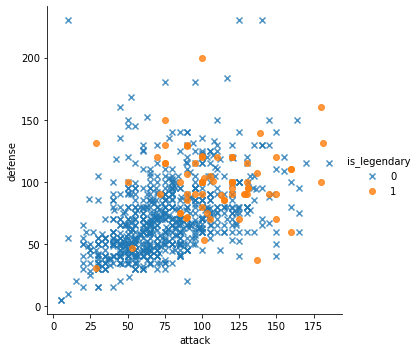

In [213]:
#Para la representación multivariable, usamos lmplot

sns.lmplot(data=pokemonDF,x='attack', y='defense', markers=['x', 'o'], hue='is_legendary',fit_reg=False)

El eje X representa el ataque, y el eje Y representa la defensa. La leyenda representa si el Pokemon es legendario (1) o no (0). Aquí vemos que, en general, los Pokemon legendarios tienen mejores estadísticas de ataque y defensa que los normales. No obstante, eso no quita que haya pokemon normales excepcionales con mejores ataques y defensas que los legendarios, pero no es la norma. 

4.2 Relación entre generación, puntuación base y legendario, con diagramas de caja

<AxesSubplot:xlabel='generation', ylabel='base_total'>

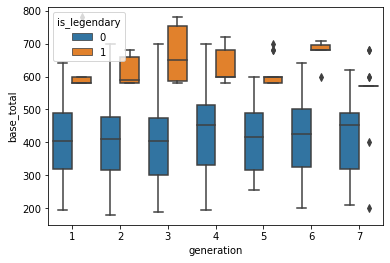

In [217]:
#Realizamos un boxplot combinado

sns.boxplot(x="generation", y="base_total", hue='is_legendary', data=pokemonDF)

El eje X representa la generación a la que pertenecen los Pokemon, y el eje Y representa los puntos base total. Los puntos base suelen definirse como la suma de todas las estadísticas: velocidad, hp, ataque, defensa, ataque especial, defensa especial... Los resultados son claros: a lo largo de todas las generaciones, los Pokemon legendarios tienen estadísticas base más elevadas que los Pokemon normales, si bien hay excepciones (puntos negros) de Pokemon normales con estadísticas inusualmente elevadas (normalmente de tipo Dragón, que son como semilegendarios). 
Durante todas las generaciones, las cajas de los Pokemon normales son muy similares. Por otro lado, las cajas de los Pokemon legendarios son más estrechas y varían de tamaño de generación en generación. 

4.3 Relaciones entre las variables de ‘salud’, ‘ataque’, ‘ataque especial’ ‘defensa’, ‘defensa especial’ y ‘velocidad’ para el conjunto completo

<AxesSubplot:>

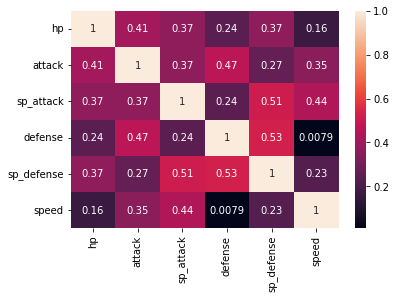

In [220]:
#Realizamos un heatmap para ver la correlación entre las distintas variables.
#Solo seleccionamos esas columnas especificas, ninguna más
#No realizamos un drop de numeros na porque, en principio, ya los tenemos limpios. 

pokemonDF1=pokemonDF.loc[:, ['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed']]
poke = pokemonDF1.corr()
sns.heatmap(poke, annot=True) # Se representa el mapa

Este gráfico muestra una matriz de correlación entre las variables hp, ataque, ataque especial, defensa, defensa especial y velocidad. Así, en los ejes X e Y encontramos estas variables, cruzándose 1 a 1.
Los índices de correlación cercanos a 1 implican que las variables tienen una fuerte correlación, y los alejados de 1 significan que no existe correlación entre las variables. 
Se puede inferir, de acuerdo a este gráfico, que las variables no están fuertemente correlacionadas entre sí. De esta manera, hp, ataque, ataque especial, defensa, defensa especial y velocidad son relativamente independientes entre sí, de forma razonada. Las variables menos correlacionadas son la velocidad - hp y la velocidad - defensa, y las más correlacionadas son el ataque - defensa y ataque especial - defensa especial. 
Esto corresponde con lo hallado en apartados anteriores, si bien a mayor ataque hay mayor defensa existen excepciones, no es siempre así. 

4.4 Relaciones entre las variables de ‘ataque’, ‘ataque especial’ ‘defensa’, ‘defensa especial’, solo para aquellos pokemon de tipo 'fighting' y 'psychic'

<AxesSubplot:>

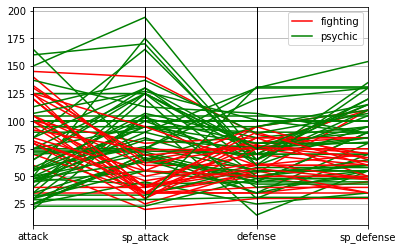

In [4]:
#Realizamos ploteo de coordenadas paralelas

from pandas.plotting import parallel_coordinates
pokemonDF2=pokemonDF.loc[:, ['type1', 'attack', 'sp_attack', 'defense', 'sp_defense']]
pokemonDF3=pokemonDF2[pokemonDF2['type1'].isin(['psychic', 'fighting'])]
parallel_coordinates(pokemonDF3, 'type1', color =['r','g'])

El eje X representa el ataque, ataque especial, defensa y defensa especial, y el eje Y representa los puntos de cada una de las estadísticas del eje X. En la leyenda, aparecen los tipos lucha y psíquico. 
Se puede inferir que los Pokemon tipo lucha, en general, tienen mayor ataque que los tipo psíquico, pero los tipo psíquico tienen mejores valores de defensa especial y ataque especial. Ambos tipos son similares en sus valores de defensa.
Conociendo Pokemon de primera mano, esto tiene sentido. Los ataques Pokemon se distinguen en los físicos (de contacto) y los especiales (sin contacto). El tipo lucha es el tipo más físico, que más ataques de este tipo tiene, mientras que el tipo psíquico (y similares, como el fantasma) tienen fundamentalmente ataques sin contacto, especiales. 